# Predict the Price of Houses

Suppose someone is selling his or her house. We would like to know what a good market price would be, and offer some suggestions. One way to do it is to first collect information on recent houses sold and make a model of housing prices. In what follows, we will analyze a training set of housing prices in Portland and Oregon by $\bf \text{gradient descent algorithm}$ for linear regression with multiple variables. Consider how the size of the house and number of bedrooms are reflected in housing price. In the end, I compare the results with what obtained from solving the linear regression problem by implementing $\bf \text{normal equations}$.

## 1. Feature Normalization

First of all, we can take a look at first 10 data points to understand the data structure more before doing further analysis: 

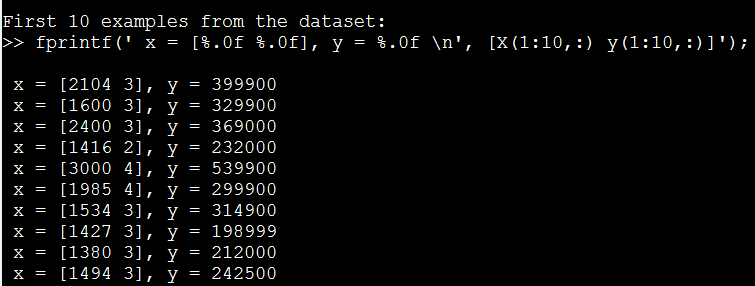

In [1]:
from IPython.display import Image
Image(filename='Figure/housing_price_data.png')

where $x$ is $m \times 2$ matrix and $y$ is $m \times 1$ matrix. Here $m=47$ is number of training samples. The first column in $x$ is the size of the house, denoted by $x_1$ in the following, and the second column in $x$, number of bedrooms denoted by $x_2$. $y$ denotes the price of the house.

Since $x_1$ is much larger than $x_2$ (1000 times the number of bedrooms $x_2$), in order to get gradient descent convergence well and more quickly, we have to do feature normalization for $x_1^{(i)}$:
\begin{equation}
x_1^{(i)} := \frac{x_1^{(i)}-\mu_1}{s_1},
\end{equation}
where $\mu_1 = 2000.6809$ is the mean value of all the values for feature 1, $x_1$, and $s_1 = 794.7025$ is the standard deviation. After feature normalization, the first 10 training samples lead to:

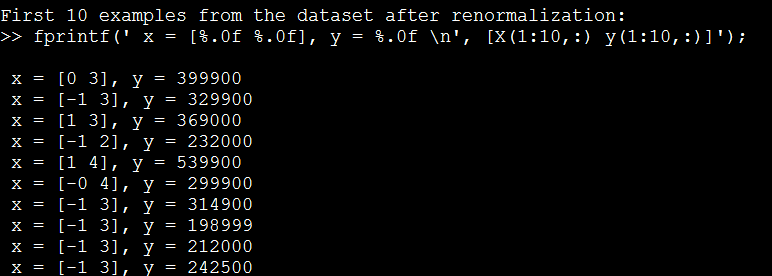

In [2]:
from IPython.display import Image
Image(filename='Figure/housing_price_normalization.png')

## 2. Model and Algorithm

We consider linear regression model with multiple variables so we assume the hypothesis function $h_\theta (x)$ given by

$$
   h_\theta (x) = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2,
$$
where $x_0 = 1$, $x_1$ is the size of the house in unit of square feet, $x_2$ is the number of bedrooms in a house, and $h_\theta (x)$ will be the predict price of the house. By using gradient descent algorithm, we fit the linear regression parameters $\theta$ to the dataset.

The objective of linear regression is to minimize the cost function,

$$
   J(\theta) = \frac{1}{2m} \sum_i \left( h_\theta (x^{(i)}) - y^{(i)}  \right)^2
$$
where $m$ indicates number of training samples. One way to minimize the cost function is to use the $\bf \text{batch gradient descent algorithm}$:

$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j},
$$
where $\alpha$ is the learning rate.

## 3. Results and Analysis

When we use batch gradient descent algorithm, we have to determine the appropriate learning rate $\alpha$ to use such that $J(\theta)$ can reach global minimum. In what follows, we experiment $\alpha = 0.3, 0.1, 0.03, 0.01, 0.003$ for 50 iterations. We found that when $\alpha = 0.3$, the cost function $J(\theta)$ diverges:

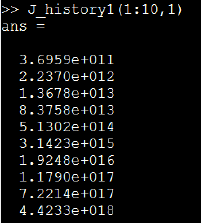

In [1]:
from IPython.display import Image
Image(filename='Figure/alpha0.3.png')

This means $\alpha = 0.3$ is too large such that the cost function diverges so one cannot find the minimum value. Hence, we can try smaller values of $\alpha$, and the results are shown in the following figure:

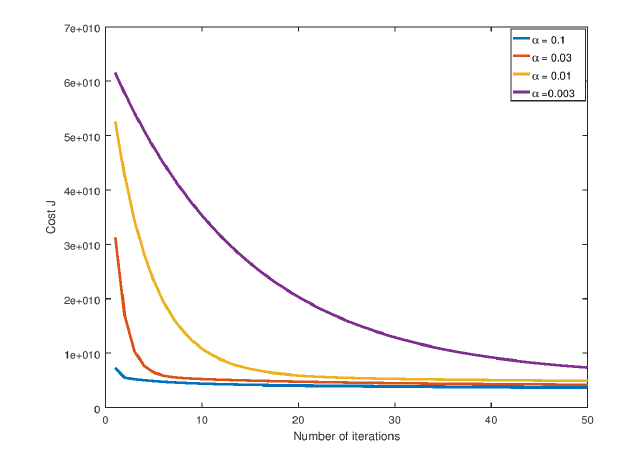

In [2]:
from IPython.display import Image
Image(filename='Figure/cost_func_vs_iteration_for_diff_alpha.png')

In the figure, it is clear that the smaller learning rate, the slower the gradient descent converge. Since $\alpha = 0.1$ is close to $\alpha = 0.3$ causing $J(\theta)$ divergence, the appropriate one is $\alpha = 0.03$ which can make $J(\theta)$ converge quickly. 

For $\alpha = 0.3$ with 10000 iterations, $\theta_0 = 368099.458214$, $\theta_1 = 110629.088876$, and $\theta_2 = -8733.574132$. Hence, the hypothesis function $h_\theta(x)$ leads to

$$
h_\theta (x) = 368099.458214 + 110629.088876 x_1 - 8733.574132 x_2,
$$
where $x_2$ is the number of bedrooms, and $x_1$ is the normalized size of the house in unit of square feet by

$$
 x_1 := \frac{x_1 -\mu_1 }{s_1}
$$
with $\mu_1 = 2000.6809$ and $s_1 = 794.70235$.

By using $h_\theta(x)$ we obtained, we can estimate the price of a house with given size and number of bedrooms. For example, the estimated price is $ 293,081 for a house with size of 1650 square feet and 3 bedrooms.

## 4. Normal Equations

Since in the current case, the number of training samples is 47 (not large), we can apply analytic algorithm, called $\bf \text{Normal Equations}$, to do the calculations. By doing so, we can also confirm what we obtained from gradient descent algorithm is correct or not.

The normal equation formula is given below:

$$
 \theta = (X^T X)^{-1} X^T Y,
$$
where

$$
 X = \begin{bmatrix}
 x_0^{(1)} & x_1^{(1)} & x_2^{(1)} \\
 x_0^{(2)} & x_1^{(2)} & x_2^{(2)} \\
 \vdots & \vdots & \vdots \\
 x_0^{(m)} & x_1^{(m)} & x_2^{(m)} 
 \end{bmatrix}, \qquad 
 \theta = \begin{bmatrix}
    \theta_0\\
    \theta_1\\
    \theta_2
 \end{bmatrix}, \qquad
 Y = \begin{bmatrix}
   y^{(1)} \\
   y^{(2)} \\
   \vdots \\
   y^{(m)}
 \end{bmatrix}.
$$
After calculations, $\theta_0 = 89597.909542$, $\theta_1 = 139.210674$, and $\theta_2 = -8738.019112$. Then we can calculate same example as what we have done by using gradient descent algorithm. That is, we calculate the estimate price of a 1650 square-feet, 3 bedrooms house with obtainted $\theta$. In the end, the estimated price is $ 293,081, which is consistent with the pridicted price by using the model fit with gradient descent algorithm.
